In [1]:
import sympy as sp
sp.init_printing(use_unicode=True)
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt



In [2]:
sp.sqrt(3)

In [3]:
x, y = sp.symbols('x y')
2*x + y

In [4]:
x, t, z, nu = sp.symbols('x t z nu')
nu

In [5]:
expresion = sp.sin(x)*sp.exp(x)
display(expresion)
display(sp.diff(expresion, x))

In [6]:
expresion = sp.exp(x)*sp.sin(x) + sp.exp(x)*sp.cos(x)
display(expresion)
display(sp.integrate(expresion, x))

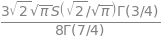

In [7]:
sp.integrate(sp.sin(x**2), (x, 0,1))

In [8]:
sp.solve(x**2 - 2, x)

In [9]:
sp.Matrix([[1, 2], [2, 2]])

⎡1  2⎤
⎢    ⎥
⎣2  2⎦

In [10]:
sp.Matrix([[1, 2], [2, 2]]).eigenvals()

In [11]:
sp.Eq(x + 1, 4)

In [12]:
expr = sp.cos(x) + 1

expr.subs(x, y)

In [13]:
str_expr = "x**2 + 3*x - 1/2"
expr = sp.sympify(str_expr)
expr

In [14]:
expr = sp.sqrt(8)
display(expr)
expr.evalf()

In [15]:
isinstance(float(expr.evalf()), float)

True

In [16]:
a = np.arange(10) 
expr = sp.sin(x)
f = sp.lambdify(x, expr, "numpy") 
f(a) 

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [17]:
a = [sp.Eq(x,y),z]
display(a)
a[0]

In [18]:
a = 1
a_1 = sp.symbols(f'V_{a}')
a_1

In [19]:
N = 4  # Cambiar el nuemro de atomos, debe ser par porque se le agregan son anilos
V_1 = sp.symbols('V_1')
V_2 = sp.symbols('V_2')
g_1 = sp.symbols('g_1')

V_1, V_2, g_1 = sp.symbols('V_1 V_2 g_1')

G = [sp.symbols(f'G_{i}{N}') for i in range(N)]

equations = []
for i in range(1, N + 1):
    if i == 1:
        equations.append(sp.Eq(G[i-1] , g_1*V_1*G[i]))
    elif i == N:
        equations.append(sp.Eq(G[i-1] , g_1 + g_1*V_1*G[i-2]))
    elif i == 2:
        equations.append(sp.Eq(G[i-1] , g_1*V_2*G[i]  + g_1*V_1*G[i-2]))
    elif 2 <= i <= N-2:
        equations.append(sp.Eq(G[i-1] , g_1*V_2*G[i]  + g_1*V_2*G[i-2]))
    else:
        equations.append(sp.Eq(G[i-1] , g_1*V_1*G[i]  + g_1*V_2*G[i-2]))

for i in range(N): display(equations[i])


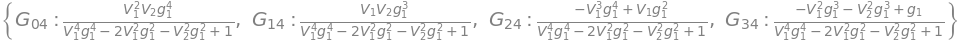

In [20]:
soluciones = sp.solve(equations, G)#, dict=True)
display(soluciones)

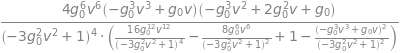

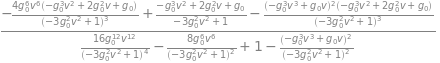

In [115]:
g0, v, E, eta = sp.symbols('g0 v E eta', real=True)
g_0 = 1 / (E - 1j * eta)
G1N_inter = soluciones[G[0]].subs({V_1: (2 * g0**3 * v**3) / (g0 - g0**3 * v**2 + 2 * g0**2 * v),
                                   V_2: (g0 * v - g0**3 * v**3) / (g0 - g0**3 * v**2 + 2 * g0**2 * v),
                                   g_1: (g0 - g0**3 * v**2 + 2 * g0**2 * v) / (1 - 3 * g0**2 * v**2)
                                  })
GNN_inter = soluciones[G[-1]].subs({V_1: (2 * g0**3 * v**3) / (g0 - g0**3 * v**2 + 2 * g0**2 * v),
                                   V_2: (g0 * v - g0**3 * v**3) / (g0 - g0**3 * v**2 + 2 * g0**2 * v),
                                   g_1: (g0 - g0**3 * v**2 + 2 * g0**2 * v) / (1 - 3 * g0**2 * v**2)
                                  })
display(G1N_inter)
display(GNN_inter)

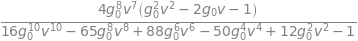

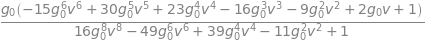

In [116]:
G1N_inter = sp.simplify(G1N_inter)
GNN_inter = sp.simplify(GNN_inter)

display(G1N_inter)
display(GNN_inter)

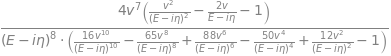

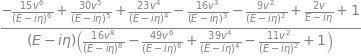

In [117]:
G1N = G1N_inter.subs({g0: 1 / (E - sp.I * eta)})
GNN = GNN_inter.subs({g0: 1 / (E - sp.I * eta)})

display(G1N)
display(GNN)

In [121]:
G1N_value = sp.lambdify([E, eta, v], G1N)
GNN_value = sp.lambdify([E, eta, v], GNN)
G1N_value(1,0.001,1)


(-1.4999838749711363-999.988250123908j)

In [109]:
#gamma = 1
#eta_v = 0.99999999

#tau_E = gamma**2*(abs(G1N_value(1,1,eta_v) 
#                      / ( (1+1j*gamma*GNN_value(1,1,eta_v))**2 + (GNN_value(1,1,eta_v))**2*gamma**2/4 )
#                     )**2)

def tau_E(E,eta,v=1,gamma=1):
    numerador = G1N_value(E,eta,v)
    denom1 = (1+1j*gamma*GNN_value(1,eta,v))**2 
    denom2 = (G1N_value(1,eta,v))**2*gamma**2/4
    cuerpo = numerador/(denom1+denom2)
    return gamma**2*abs(cuerpo)**2


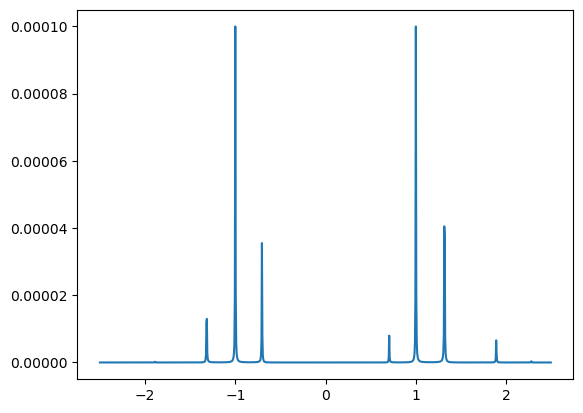

In [111]:
E_ini = -2.5
E_end = 2.5
N_pasos = 1000
E_step = (E_end - E_ini) / N_pasos
eta_v = E_step / 2 #eta = La mitad del paso
E_values = np.arange(E_ini, E_end, E_step)

tau_values = []
for i,E_value in enumerate(E_values):
    tau_values.append(tau_E(E_value,E_step/2))
    #print(f'paso {i+1}/{N_pasos}  :  energia {E_value}')

#print(tau_values)
plt.plot(E_values, tau_values, label='$\\tau(E)$')


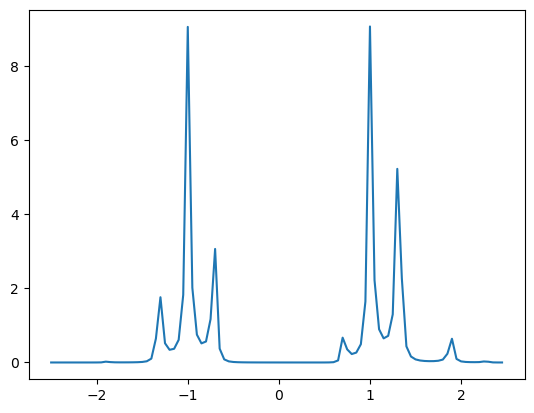

In [90]:
plt.plot(E_values, tau_values, label='$\\tau(E)$')

In [24]:
#sp.expand_complex(G1N)
#sp.conjugate(GNN)

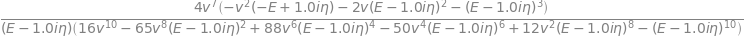

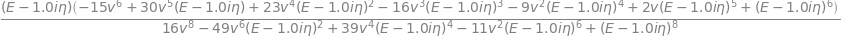

In [112]:
G1N = G1N_inter.subs({g0: 1 / (E - 1j * eta)})
GNN = GNN_inter.subs({g0: 1 / (E - 1j * eta)})
G1N = sp.simplify(G1N)
GNN = sp.simplify(GNN)
display(G1N)
display(GNN)

tau_E = gamma**2*(abs(G[0] / ( (1+1j*gamma*G[-1])**2 + (G[0])**2*gamma**2/4 ))**2)
tau_E = tau_E.subs({G[0]: G1N, G[-1]: GNN})
tau_f = sp.lambdify([E, eta, v] , tau_E)

#sp.expand(G1N)
#expr = (1/(E-sp.I*eta) + 1/(E-sp.I*eta)**2 + 1) / (1/(E-sp.I*eta)**3 + 1/(E-sp.I*eta)**4 + 1)
#display( expr )
#sp.expand_complex( expr )


In [113]:
tau_f(1,0.00000001,1)

(-3.97422097417028e-18-3.5928332625544163e-26j)

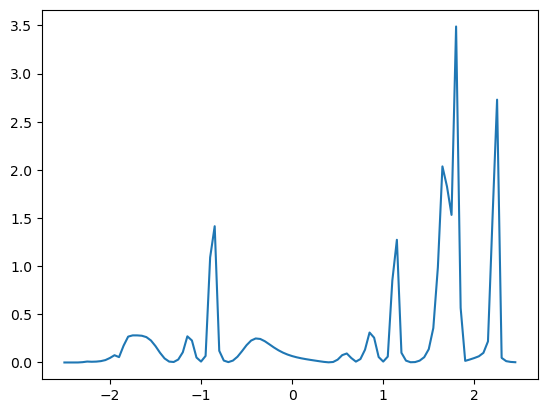

In [114]:
#display(tau_E)

E_ini = -2.5
E_end = 2.5
N_pasos = 100
E_step = (E_end - E_ini) / N_pasos
eta_v = E_step / 2 #eta = La mitad del paso
E_values = np.arange(E_ini, E_end, E_step)

tau_values = []
for i,E_value in enumerate(E_values):
    tau_values.append(tau_f(E_value,E_step/2,1))
    #print(f'paso {i+1}/{N_pasos}  :  energia {E_value}')

#print(tau_values)
plt.plot(E_values, tau_values, label='$\\tau(E)$')


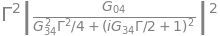

In [26]:
tau, gamma = sp.symbols('tau Gamma ', real=True)


tau_E = gamma**2*(abs(G[0] / ( (1+sp.nsimplify(sp.Rational(1, 2)*sp.I)*gamma*G[-1])**2 + (G[-1])**2*gamma**2/4 ))**2)
#sp.simplify( tau_E.subs({G[0]: G1N, G[-1]: GNN}) )
display(tau_E)

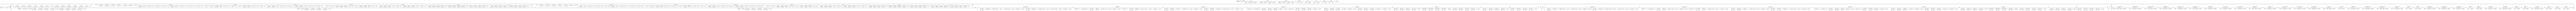

In [35]:
#tau_E.subs({G[0]: G1N, G[-1]: GNN})

In [27]:
#tau_E.subs({G[0]: G1N, G[-1]: GNN})
#b = ((G[-1])**2*gamma**2/4).subs({G[-1]: GNN})
#b

In [28]:
#sp.simplify(((G[-1])**2*gamma**2/4).subs({G[-1]: GNN}))


In [29]:
#sp.simplify(((1+sp.Rational(1, 2)j*gamma*G[-1]/2)**2).subs({G[-1]: GNN}))


In [30]:
#display(
#((1+sp.nsimplify(sp.Rational(1, 2)*sp.I)*gamma*G[-1])**2).subs({G[-1]: GNN})

In [31]:
#a = sp.simplify(((1+sp.nsimplify(sp.Rational(1, 2)*sp.I)*gamma*G[-1])**2).subs({G[-1]: GNN}))
#a

In [32]:
#c = sp.expand(a+b)
#c

In [33]:
#sp.simplify(G1N/c)

In [34]:
#sp.conjugate(G1N/c)*G1N/c